<a href="https://colab.research.google.com/github/jgamel/learn_n_dev/blob/python_data_prep_cleaning/Data_Prep_Histograms_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#How to Model Human Activity From Smartphone Data

Human activity recognition is the problem of classifying sequences of accelerometer data recorded by specialized harnesses or smart phones into known well-defined movements.

It is a challenging problem given the large number of observations produced each second, the temporal nature of the observations, and the lack of a clear way to relate accelerometer data to known movements.

Classical approaches to the problem involve hand crafting features from the time series data based on fixed-sized windows and training machine learning models, such as ensembles of decision trees. The difficulty is that this feature engineering requires deep expertise in the field.

Recently, deep learning methods such as recurrent neural networks and one-dimensional convolutional neural networks, or CNNs, have been shown to provide state-of-the-art results on challenging activity recognition tasks with little or no data feature engineering.

In this tutorial, you will discover the ‘Activity Recognition Using Smartphones‘ dataset for time series classification and how to load and explore the dataset in order to make it ready for predictive modeling.

### Overview

* Human Activity Recognition
* Activity Recognition Using Smartphones Dataset
* Download the Dataset
* Load Data
* Balance of Activity Classes
* Plot Time Series Data for One Subject
* Plot Histograms Per Subject
* Plot Histograms Per Activity
* Plot Activity Duration Boxplots
* Approach to Modeling

## Human Activity Recognition


[Human Activity Recognition](https://en.wikipedia.org/wiki/Activity_recognition), or HAR for short, is the problem of predicting what a person is doing based on a trace of their movement using sensors.

Movements are often normal indoor activities such as standing, sitting, jumping, and going up stairs.

Sensors are often located on the subject, such as a smartphone or vest, and often record accelerometer data in three dimensions (x, y, z).

The idea is that once the subject’s activity is recognized and known, an intelligent computer system can then offer assistance.

It is a challenging problem because there is no clear analytical way to relate the sensor data to specific actions in a general way. It is technically challenging because of the large volume of sensor data collected (e.g. tens or hundreds of observations per second) and the classical use of hand crafted features and heuristics from this data in developing predictive models.

More recently, deep learning methods have been demonstrated successfully on HAR problems given their ability to automatically learn higher-order features.

## Activity Recognition Using Smartphones Dataset

A standard human activity recognition dataset is the ‘Activity Recognition Using Smartphones‘ dataset made available in 2012.

It was prepared and made available by Davide Anguita, et al. from the University of Genova, Italy and is described in full in their 2013 paper “A Public Domain Dataset for Human Activity Recognition Using Smartphones.” The dataset was modeled with machine learning algorithms in their 2012 paper titled “Human Activity Recognition on Smartphones using a Multiclass Hardware-Friendly Support Vector Machine.”

The dataset was made available and can be downloaded for free from the UCI Machine Learning Repository:

Human Activity Recognition Using Smartphones Data Set
The data was collected from 30 subjects aged between 19 and 48 years old performing one of 6 standard activities while wearing a waist-mounted smartphone that recorded the movement data. Video was recorded of each subject performing the activities and the movement data was labeled manually from these videos.

Below is an example video of a subject performing the activities while their movement data is being recorded.




In [8]:
from IPython.display import HTML
HTML('<iframe width="623" height="467" src="https://www.youtube.com/embed/XOEN9W05_4A" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


The six activities performed were as follows:

1. Walking
2. Walking Upstairs
3. Walking Downstairs
4. Sitting
6. Standing
6. Laying

The movement data recorded was the x, y, and z accelerometer data (linear acceleration) and gyroscopic data (angular velocity) from the smart phone, specifically a Samsung Galaxy S II.

Observations were recorded at 50 Hz (i.e. 50 data points per second). Each subject performed the sequence of activities twice, once with the device on their left-hand-side and once with the device on their right-hand side.

The raw data is not available. Instead, a pre-processed version of the dataset was made available.

The pre-processing steps included:

* Pre-processing accelerometer and gyroscope using noise filters.
* Splitting data into fixed windows of 2.56 seconds (128 data points) with 50% overlap.
* Splitting of accelerometer data into gravitational (total) and body motion components.

Feature engineering was applied to the window data, and a copy of the data with these engineered features was made available.

A number of time and frequency features commonly used in the field of human activity recognition were extracted from each window. The result was a 561 element vector of features.

The dataset was split into train (70%) and test (30%) sets based on data for subjects, e.g. 21 subjects for train and nine for test.

This suggests a framing of the problem where a sequence of movement activity is used as input to predict the portion (2.56 seconds) of the current activity being performed, where a model trained on known subjects is used to predict the activity from movement on new subjects.

Early experiment results with a support vector machine intended for use on a smartphone (e.g. fixed-point arithmetic) resulted in a predictive accuracy of 89% on the test dataset, achieving similar results as an unmodified SVM implementation.

Now that we are familiar with the prediction problem, we will look at loading and exploring this dataset.

## Download the Dataset

The dataset is freely available and can be downloaded from the UCI Machine Learning repository.

The data is provided as a single zip file that is about 58 megabytes in size. The direct link for this download is below:

[UCI HAR Dataset.zip](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip)

Download the dataset and unzip all files into a new directory in your current working directory named “HARDataset“.

Inspecting the decompressed contents, you will notice a few things:

* There are “train” and “test” folders containing the split portions of the data for modeling (e.g. 70%/30%).
* There is a “README.txt” file that contains a detailed technical description of the dataset and the contents of the unzipped files.
* There is a “features.txt” file that contains a technical description of the engineered features.
The contents of the “train” and “test” folders are similar (e.g. folders and file names), although with differences in the specific data they contain.

Inspecting the “train” folder shows a few important elements:

* An “Inertial Signals” folder that contains the preprocessed data.
* The “X_train.txt” file that contains the engineered features intended for fitting a model.
* The “y_train.txt” that contains the class labels for each observation (1-6).
* The “subject_train.txt” file that contains a mapping of each line in the data files with their subject identifier (1-30).

The number of lines in each file match, indicating that one row is one record in each data file.

The “Inertial Signals” directory contains 9 files.

* Gravitational acceleration data files for x, y and z axes: total_acc_x_train.txt, total_acc_y_train.txt, total_acc_z_train.txt.
* Body acceleration data files for x, y and z axes: body_acc_x_train.txt, body_acc_y_train.txt, body_acc_z_train.txt.
* Body gyroscope data files for x, y and z axes: body_gyro_x_train.txt, body_gyro_y_train.txt, body_gyro_z_train.txt.

The structure is mirrored in the “test” directory.

We will focus our attention on the data in the “Inertial Signals” as this is most interesting in developing machine learning models that can learn a suitable representation, instead of using the domain-specific feature engineering.

Inspecting a datafile shows that columns are separated by whitespace and values appear to be scaled to the range -1, 1. This scaling can be confirmed by a note in the README.txt file provided with the dataset.

Now that we know what data we have, we can figure out how to load it into memory.

## Load Data

In this section, we will develop some code to load the dataset into memory.

First, we need to load a single file.

We can use the read_csv() Pandas function to load a single data file and specify that the file has no header and to separate columns using white space.

```dataframe = read_csv(filepath, header=None, delim_whitespace=True)```

We can wrap this in a function named load_file(). The complete example of this function is listed below.



In [9]:
# Mount Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [11]:
# load dataset
from pandas import read_csv

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

data = load_file('/content/gdrive/My Drive/input_examples/UCI_HAR_Dataset/train/Inertial Signals/total_acc_y_train.txt')
print(data.shape)

(7352, 128)


Running the example loads the file ‘total_acc_y_train.txt‘, returns a NumPy array, and prints the shape of the array.

We can see that the training data is comprised of 7,352 rows or windows of data, where each window has 128 observations.

Next, it would be useful to load a group of files, such as all of the body acceleration data files as a single group.

Ideally, when working with multivariate time series data, it is useful to have the data structured in the format:

```[samples, timesteps, features]```

This is helpful for analysis and is the expectation of deep learning models such as convolutional neural networks and recurrent neural networks.

We can achieve this by calling the above load_file() function multiple times, once for each file in a group.

Once we have loaded each file as a NumPy array, we can combine or stack all three arrays together. We can use the dstack() NumPy function to ensure that each array is stacked in such a way that the features are separated in the third dimension, as we would prefer.

The function load_group() implements this behavior for a list of file names and is listed below.



In [12]:
# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

We can demonstrate this function by loading all of the total acceleration files.

The complete example is listed below.

In [13]:
# load dataset
from numpy import dstack
from pandas import read_csv

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load the total acc data
filenames = ['total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']
total_acc = load_group(filenames, prefix='/content/gdrive/My Drive/input_examples/UCI_HAR_Dataset/train/Inertial Signals/')
print(total_acc.shape)

(7352, 128, 3)


Running the example prints the shape of the returned NumPy array, showing the expected number of samples and time steps with the three features, x, y, and z for the dataset.

Finally, we can use the two functions developed so far to load all data for the train and the test dataset.

Given the parallel structure in the train and test folders, we can develop a new function that loads all input and output data for a given folder. The function can build a list of all 9 data files to load, load them as one NumPy array with 9 features, then load the data file containing the output class.

The load_dataset() function below implements this behaviour. It can be called for either the “train” group or the “test” group, passed as a string argument.

In [14]:
# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

The complete example is listed below.

In [15]:
# load dataset
from numpy import dstack
from pandas import read_csv

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# load all train
trainX, trainy = load_dataset('train', '/content/gdrive/My Drive/input_examples/UCI_HAR_Dataset/')
print(trainX.shape, trainy.shape)
# load all test
testX, testy = load_dataset('test', '/content/gdrive/My Drive/input_examples/UCI_HAR_Dataset/')
print(testX.shape, testy.shape)

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)


Running the example loads the train and test datasets.

We can see that the test dataset has 2,947 rows of window data. As expected, we can see that the size of windows in the train and test sets matches and the size of the output (y) in each the train and test case matches the number of samples.

Now that we know how to load the data, we can start to explore it.

## Balance of Activity Classes

A good first check of the data is to investigate the balance of each activity.

We believe that each of the 30 subjects performed each of the six activities.

Confirming this expectation will both check that the data is indeed balanced, making it easier to model, and confirm that we are correctly loading and interpreting the dataset.

We can develop a function that summarizes the breakdown of the output variables, e.g. the y variable.

The function class_breakdown() below implements this behavior, first wrapping the provided NumPy array in a DataFrame, grouping the rows by the class value, and calculating the size of each group (number of rows). The results are then summarized, including the count and the percentage.

In [16]:
# summarize the balance of classes in an output variable column
def class_breakdown(data):
	# convert the numpy array into a dataframe
	df = DataFrame(data)
	# group data by the class value and calculate the number of rows
	counts = df.groupby(0).size()
	# retrieve raw rows
	counts = counts.values
	# summarize
	for i in range(len(counts)):
		percent = counts[i] / len(df) * 100
		print('Class=%d, total=%d, percentage=%.3f' % (i+1, counts[i], percent))

It may be useful to summarize the breakdown of the classes in the train and test datasets to ensure they have a similar breakdown, then compare the result to the breakdown on the combined dataset.

The complete example is listed below.

In [17]:
# summarize class balance
from numpy import array
from numpy import vstack
from pandas import read_csv
from pandas import DataFrame

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# summarize the balance of classes in an output variable column
def class_breakdown(data):
	# convert the numpy array into a dataframe
	df = DataFrame(data)
	# group data by the class value and calculate the number of rows
	counts = df.groupby(0).size()
	# retrieve raw rows
	counts = counts.values
	# summarize
	for i in range(len(counts)):
		percent = counts[i] / len(df) * 100
		print('Class=%d, total=%d, percentage=%.3f' % (i+1, counts[i], percent))

# load train file
trainy = load_file('/content/gdrive/My Drive/input_examples/UCI_HAR_Dataset/train/y_train.txt')
# summarize class breakdown
print('Train Dataset')
class_breakdown(trainy)

# load test file
testy = load_file('/content/gdrive/My Drive/input_examples/UCI_HAR_Dataset/test/y_test.txt')
# summarize class breakdown
print('Test Dataset')
class_breakdown(testy)

# summarize combined class breakdown
print('Both')
combined = vstack((trainy, testy))
class_breakdown(combined)

Train Dataset
Class=1, total=1226, percentage=16.676
Class=2, total=1073, percentage=14.595
Class=3, total=986, percentage=13.411
Class=4, total=1286, percentage=17.492
Class=5, total=1374, percentage=18.689
Class=6, total=1407, percentage=19.138
Test Dataset
Class=1, total=496, percentage=16.831
Class=2, total=471, percentage=15.982
Class=3, total=420, percentage=14.252
Class=4, total=491, percentage=16.661
Class=5, total=532, percentage=18.052
Class=6, total=537, percentage=18.222
Both
Class=1, total=1722, percentage=16.720
Class=2, total=1544, percentage=14.992
Class=3, total=1406, percentage=13.652
Class=4, total=1777, percentage=17.254
Class=5, total=1906, percentage=18.507
Class=6, total=1944, percentage=18.876


Running the example first summarizes the breakdown for the training set. We can see a pretty similar distribution of each class hovering between 13% and 19% of the dataset.

The result on the test set and on both datasets together look very similar.

It is likely safe to work with the dataset assuming the distribution of classes is balanced per train and test set and perhaps per subject.

## Plot Time Series Data for One Subject

We are working with time series data, therefore an import check is to create a line plot of the raw data.

The raw data is comprised of windows of time series data per variable, and the windows do have a 50% overlap. This suggests we may see some repetition in the observations as a line plot unless the overlap is removed.

We can start off by loading the training dataset using the functions developed above.

```
# load data
trainX, trainy = load_dataset('train', 'HARDataset/')
```
Next, we can load the ‘subject_train.txt‘ in the ‘train‘ directory that provides a mapping of rows to the subject to which it belongs.

We can load this file using the load_file() function. Once loaded, we can also use the unique() NumPy function to retrieve a list of the unique subjects in the training dataset.

```
sub_map = load_file('HARDataset/train/subject_train.txt')
train_subjects = unique(sub_map)
print(train_subjects)
```

Next, we need a way to retrieve all of the rows for a single subject, e.g. subject number 1.

We can do this by finding all of the row numbers that belong to a given subject and use those row numbers to select the samples from the loaded X and y data from the training dataset.

The data_for_subject() function below implements this behavior. It will take the loaded training data, the loaded mapping of row number to subjects, and the subject identification number for the subject that we are interested in, and will return the X and y data for only that subject.

```
# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]
```

Now that we have data for one subject, we can plot it.

The data is comprised of windows with overlap. We can write a function to remove this overlap and squash the windows down for a given variable into one long sequence that can be plotted directly as a line plot.

The to_series() function below implements this behavior for a given variable, e.g. array of windows.

```
# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series
```

Finally, we have enough to plot the data. We can plot each of the nine variables for the subject in turn and a final plot for the activity level.

Each series will have the same number of time steps (length of x-axis), therefore, it may be useful to create a subplot for each variable and align all plots vertically so we can compare the movement on each variable.

The plot_subject() function below implements this behavior for the X and y data for a single subject. The function assumes the same order of the variables (3rd axis) as was loaded in the load_dataset() function. A crude title is also added to each plot so we don’t get easily confused about what we are looking at.

```
# plot the data for one subject
def plot_subject(X, y):
	pyplot.figure()
	# determine the total number of plots
	n, off = X.shape[2] + 1, 0
	# plot total acc
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('total acc '+str(i), y=0, loc='left')
		off += 1
	# plot body acc
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('body acc '+str(i), y=0, loc='left')
		off += 1
	# plot body gyro
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('body gyro '+str(i), y=0, loc='left')
		off += 1
	# plot activities
	pyplot.subplot(n, 1, n)
	pyplot.plot(y)
	pyplot.title('activity', y=0, loc='left')
	pyplot.show()
```

The complete example is listed below.



[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
(347, 128, 9) (347, 1)


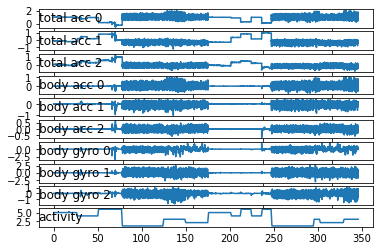

In [18]:
# plot all vars for one subject
from numpy import array
from numpy import dstack
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]

# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series

# plot the data for one subject
def plot_subject(X, y):
	pyplot.figure()
	# determine the total number of plots
	n, off = X.shape[2] + 1, 0
	# plot total acc
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('total acc '+str(i), y=0, loc='left')
		off += 1
	# plot body acc
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('body acc '+str(i), y=0, loc='left')
		off += 1
	# plot body gyro
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('body gyro '+str(i), y=0, loc='left')
		off += 1
	# plot activities
	pyplot.subplot(n, 1, n)
	pyplot.plot(y)
	pyplot.title('activity', y=0, loc='left')
	pyplot.show()

# load data
trainX, trainy = load_dataset('train', '/content/gdrive/My Drive/input_examples/UCI_HAR_Dataset/')
# load mapping of rows to subjects
sub_map = load_file('/content/gdrive/My Drive/input_examples/UCI_HAR_Dataset/train/subject_train.txt')
train_subjects = unique(sub_map)
print(train_subjects)
# get the data for one subject
sub_id = train_subjects[0]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
print(subX.shape, suby.shape)
# plot data for subject
plot_subject(subX, suby)

Running the example prints the unique subjects in the training dataset, the sample of the data for the first subject, and creates one figure with 10 plots, one for each of the nine input variables and the output class.

In the plot, we can see periods of large movement corresponding with activities 1, 2, and 3: the walking activities. We can also see much less activity (i.e. a relatively straight line) for higher numbered activities, 4, 5, and 6 (sitting, standing, and laying).

This is good confirmation that we have correctly loaded interpreted the raw dataset.

We can see that this subject has performed the same general sequence of activities twice, and some activities are performed more than two times. This suggests that for a given subject, we should not make assumptions about what activities may have been performed or their order.

We can also see some relatively large movement for some stationary activities, such as laying. It is possible that these are outliers or related to activity transitions. It may be possible to smooth or remove these observations as outliers.

Finally, we see a lot of commonality across the nine variables. It is very likely that only a subset of these traces are required to develop a predictive model.

We can re-run the example for another subject by making one small change, e.g. choose the identifier of the second subject in the training dataset.

```
# get the data for one subject
sub_id = train_subjects[1]
```

The plot for the second subject shows similar behavior with no surprises.

The double sequence of activities does appear more regular than the first subject.

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
(341, 128, 9) (341, 1)


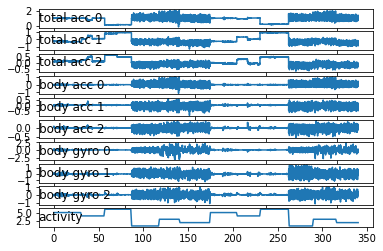

In [20]:
# plot all vars for one subject
from numpy import array
from numpy import dstack
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]

# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series

# plot the data for one subject
def plot_subject(X, y):
	pyplot.figure()
	# determine the total number of plots
	n, off = X.shape[2] + 1, 0
	# plot total acc
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('total acc '+str(i), y=0, loc='left')
		off += 1
	# plot body acc
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('body acc '+str(i), y=0, loc='left')
		off += 1
	# plot body gyro
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('body gyro '+str(i), y=0, loc='left')
		off += 1
	# plot activities
	pyplot.subplot(n, 1, n)
	pyplot.plot(y)
	pyplot.title('activity', y=0, loc='left')
	pyplot.show()

# load data
trainX, trainy = load_dataset('train', '/content/gdrive/My Drive/input_examples/UCI_HAR_Dataset/')
# load mapping of rows to subjects
sub_map = load_file('/content/gdrive/My Drive/input_examples/UCI_HAR_Dataset/train/subject_train.txt')
train_subjects = unique(sub_map)
print(train_subjects)
# get the data for one subject
sub_id = train_subjects[1]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
print(subX.shape, suby.shape)
# plot data for subject
plot_subject(subX, suby)

## Plot Histograms Per Subject

As the problem is framed, we are interested in using the movement data from some subjects to predict activities from the movement of other subjects.

This suggests that there must be regularity in the movement data across subjects. We know that the data has been scaled between -1 and 1, presumably per subject, suggesting that the amplitude of the detected movements will be similar.

We would also expect that the distribution of movement data would be similar across subjects, given that they performed the same actions.

We can check for this by plotting and comparing the histograms of the movement data across subjects. A useful approach would be to create one plot per subject and plot all three axis of a given data (e.g. total acceleration), then repeat this for multiple subjects. The plots can be modified to use the same axis and aligned horizontally so that the distributions for each variable across subjects can be compared.

The plot_subject_histograms() function below implements this behavior. The function takes the loaded dataset and mapping of rows to subjects as well as a maximum number of subjects to plot, fixed at 10 by default.

A plot is created for each subject and the three variables for one data type are plotted as histograms with 100 bins, to help to make the distribution obvious. Each plot shares the same axis, which is fixed at the bounds of -1 and 1.

In [21]:
# plot histograms for multiple subjects
def plot_subject_histograms(X, y, sub_map, n=10):
	pyplot.figure()
	# get unique subjects
	subject_ids = unique(sub_map[:,0])
	# enumerate subjects
	xaxis = None
	for k in range(n):
		sub_id = subject_ids[k]
		# get data for one subject
		subX, _ = data_for_subject(X, y, sub_map, sub_id)
		# total acc
		for i in range(3):
			ax = pyplot.subplot(n, 1, k+1, sharex=xaxis)
			ax.set_xlim(-1,1)
			if k == 0:
				xaxis = ax
			pyplot.hist(to_series(subX[:,:,i]), bins=100)
	pyplot.show()

The complete example is listed below.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


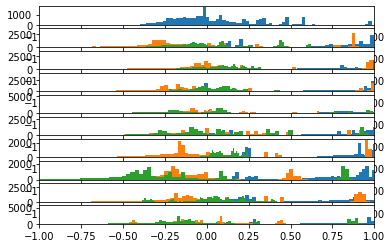

In [22]:
# plot histograms for multiple subjects
from numpy import array
from numpy import unique
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]

# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series

# plot histograms for multiple subjects
def plot_subject_histograms(X, y, sub_map, n=10):
	pyplot.figure()
	# get unique subjects
	subject_ids = unique(sub_map[:,0])
	# enumerate subjects
	xaxis = None
	for k in range(n):
		sub_id = subject_ids[k]
		# get data for one subject
		subX, _ = data_for_subject(X, y, sub_map, sub_id)
		# total acc
		for i in range(3):
			ax = pyplot.subplot(n, 1, k+1, sharex=xaxis)
			ax.set_xlim(-1,1)
			if k == 0:
				xaxis = ax
			pyplot.hist(to_series(subX[:,:,i]), bins=100)
	pyplot.show()

# load training dataset
X, y = load_dataset('train', '/content/gdrive/My Drive/input_examples/UCI_HAR_Dataset/')
# load mapping of rows to subjects
sub_map = load_file('/content/gdrive/My Drive/input_examples/UCI_HAR_Dataset/train/subject_train.txt')
# plot histograms for subjects
plot_subject_histograms(X, y, sub_map)

Running the example creates a single figure with 10 plots with histograms for the three axis of the total acceleration data.

Each of the three axes on a given plot have a different color, specifically x, y, and z are blue, orange, and green respectively.

We can see that the distribution for a given axis does appear Gaussian with large separate groups of data.

We can see some of the distributions align (e.g. main groups in the middle around 0.0), suggesting there may be some continuity of the movement data across subjects, at least for this data.

We can update the plot_subject_histograms() function to next plot the distributions of the body acceleration. The updated function is listed below.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


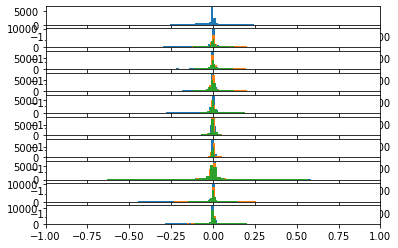

In [26]:
# plot histograms for multiple subjects
def plot_subject_histograms(X, y, sub_map, n=10):
	pyplot.figure()
	# get unique subjects
	subject_ids = unique(sub_map[:,0])
	# enumerate subjects
	xaxis = None
	for k in range(n):
		sub_id = subject_ids[k]
		# get data for one subject
		subX, _ = data_for_subject(X, y, sub_map, sub_id)
		# body acc
		for i in range(3):
			ax = pyplot.subplot(n, 1, k+1, sharex=xaxis)
			ax.set_xlim(-1,1)
			if k == 0:
				xaxis = ax
			pyplot.hist(to_series(subX[:,:,3+i]), bins=100)
	pyplot.show()
 
plot_subject_histograms(X, y, sub_map, n=10)

Running the updated example creates the same plot with very different results.

Here we can see all data clustered around 0.0 across axis within a subject and across subjects. This suggests that perhaps the data was centered (zero mean). This strong consistency across subjects may aid in modeling, and may suggest that the differences across subjects in the total acceleration data may not be as helpful.

Finally, we can generate one final plot for the gyroscopic data.

The updated function is listed below.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


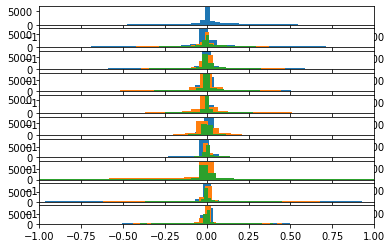

In [29]:
# plot histograms for multiple subjects
def plot_subject_histograms(X, y, sub_map, n=10):
	pyplot.figure()
	# get unique subjects
	subject_ids = unique(sub_map[:,0])
	# enumerate subjects
	xaxis = None
	for k in range(n):
		sub_id = subject_ids[k]
		# get data for one subject
		subX, _ = data_for_subject(X, y, sub_map, sub_id)
		# body acc
		for i in range(3):
			ax = pyplot.subplot(n, 1, k+1, sharex=xaxis)
			ax.set_xlim(-1,1)
			if k == 0:
				xaxis = ax
			pyplot.hist(to_series(subX[:,:,6+i]), bins=100)
	pyplot.show()
 
plot_subject_histograms(X, y, sub_map, n=10)

Running the example shows very similar results to the body acceleration data.

We see a high likelihood of a Gaussian distribution for each axis across each subject centered on 0.0. The distributions are a little wider and show fatter tails, but this is an encouraging finding for modeling movement data across subjects.

## Plot Histograms Per Activity

We are interested in discriminating between activities based on activity data.

The simplest case for this would be to discriminate between activities for a single subject. One way to investigate this would be to review the distribution of movement data for a subject by activity. We would expect to see some difference in the distribution between the movement data for different activities by a single subject.

We can review this by creating a histogram plot per activity, with the three axis of a given data type on each plot. Again, the plots can be arranged horizontally to compare the distribution of each data axis by activity. We would expect to see differences in the distributions across activities down the plots.

First, we must group the traces for a subject by activity. The data_by_activity() function below implements this behaviour.

```
# group data by activity
def data_by_activity(X, y, activities):
	# group windows by activity
	return {a:X[y[:,0]==a, :, :] for a in activities}
```

We can now create plots per activity for a given subject.

The plot_activity_histograms() function below implements this function for the traces data for a given subject.

First, the data is grouped by activity, then one subplot is created for each activity and each axis of the data type is added as a histogram. The function only enumerates the first three features of the data, which are the total acceleration variables.

```
# plot histograms for each activity for a subject
def plot_activity_histograms(X, y):
	# get a list of unique activities for the subject
	activity_ids = unique(y[:,0])
	# group windows by activity
	grouped = data_by_activity(X, y, activity_ids)
	# plot per activity, histograms for each axis
	pyplot.figure()
	xaxis = None
	for k in range(len(activity_ids)):
		act_id = activity_ids[k]
		# total acceleration
		for i in range(3):
			ax = pyplot.subplot(len(activity_ids), 1, k+1, sharex=xaxis)
			ax.set_xlim(-1,1)
			if k == 0:
				xaxis = ax
			pyplot.hist(to_series(grouped[act_id][:,:,i]), bins=100)
			pyplot.title('activity '+str(act_id), y=0, loc='left')
	pyplot.show()
```
The complete example is listed below.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


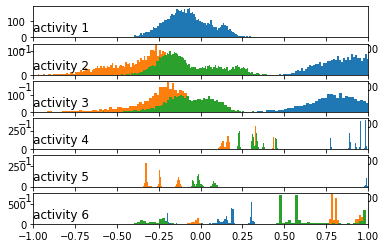

In [30]:
# plot histograms per activity for a subject
from numpy import array
from numpy import dstack
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]

# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series

# group data by activity
def data_by_activity(X, y, activities):
	# group windows by activity
	return {a:X[y[:,0]==a, :, :] for a in activities}

# plot histograms for each activity for a subject
def plot_activity_histograms(X, y):
	# get a list of unique activities for the subject
	activity_ids = unique(y[:,0])
	# group windows by activity
	grouped = data_by_activity(X, y, activity_ids)
	# plot per activity, histograms for each axis
	pyplot.figure()
	xaxis = None
	for k in range(len(activity_ids)):
		act_id = activity_ids[k]
		# total acceleration
		for i in range(3):
			ax = pyplot.subplot(len(activity_ids), 1, k+1, sharex=xaxis)
			ax.set_xlim(-1,1)
			if k == 0:
				xaxis = ax
			pyplot.hist(to_series(grouped[act_id][:,:,i]), bins=100)
			pyplot.title('activity '+str(act_id), y=0, loc='left')
	pyplot.show()

# load data
trainX, trainy = load_dataset('train', '/content/gdrive/My Drive/input_examples/UCI_HAR_Dataset/')
# load mapping of rows to subjects
sub_map = load_file('/content/gdrive/My Drive/input_examples/UCI_HAR_Dataset/train/subject_train.txt')
train_subjects = unique(sub_map)
# get the data for one subject
sub_id = train_subjects[0]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
# plot data for subject
plot_activity_histograms(subX, suby)

Running the example creates the plot with six subplots, one for each activity for the first subject in the train dataset. Each of the x, y, and z axes for the total acceleration data have a blue, orange, and green histogram respectively.

We can see that each activity has a different data distribution, with a marked difference between the large movement (first three activities) with the stationary activities (last three activities). Data distributions for the first three activities look Gaussian with perhaps differing means and standard deviations. Distributions for the latter activities look multi-modal (i.e. multiple peaks).

We can re-run the same example with an updated version of the plot_activity_histograms() that plots the body acceleration data instead.

The updated function is listed below.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


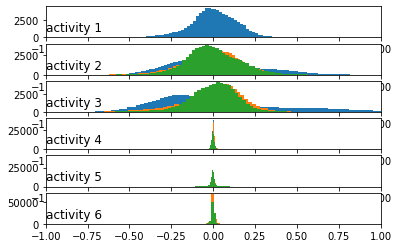

In [31]:
# plot histograms for each activity for a subject
def plot_activity_histograms(X, y):
	# get a list of unique activities for the subject
	activity_ids = unique(y[:,0])
	# group windows by activity
	grouped = data_by_activity(X, y, activity_ids)
	# plot per activity, histograms for each axis
	pyplot.figure()
	xaxis = None
	for k in range(len(activity_ids)):
		act_id = activity_ids[k]
		# total acceleration
		for i in range(3):
			ax = pyplot.subplot(len(activity_ids), 1, k+1, sharex=xaxis)
			ax.set_xlim(-1,1)
			if k == 0:
				xaxis = ax
			pyplot.hist(to_series(grouped[act_id][:,:,3+i]), bins=100)
			pyplot.title('activity '+str(act_id), y=0, loc='left')
	pyplot.show()
plot_activity_histograms(X, y)

Running the updated example creates a new plot.

Here, we can see more similar distributions across the activities amongst the in-motion vs. stationary activities. The data looks bimodal in the case of the in-motion activities and perhaps Gaussian or exponential in the case of the stationary activities.

The pattern we see with the total vs. body acceleration distributions by activity mirrors what we see with the same data types across subjects in the previous section. Perhaps the total acceleration data is the key to discriminating the activities.

Finally, we can update the example one more time to plot the histograms per activity for the gyroscopic data.

The updated function is listed below.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


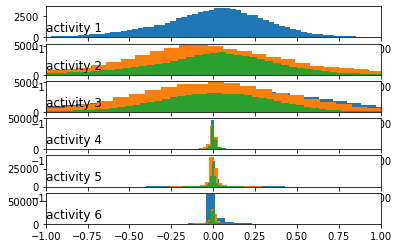

In [33]:
# plot histograms for each activity for a subject
def plot_activity_histograms(X, y):
	# get a list of unique activities for the subject
	activity_ids = unique(y[:,0])
	# group windows by activity
	grouped = data_by_activity(X, y, activity_ids)
	# plot per activity, histograms for each axis
	pyplot.figure()
	xaxis = None
	for k in range(len(activity_ids)):
		act_id = activity_ids[k]
		# total acceleration
		for i in range(3):
			ax = pyplot.subplot(len(activity_ids), 1, k+1, sharex=xaxis)
			ax.set_xlim(-1,1)
			if k == 0:
				xaxis = ax
			pyplot.hist(to_series(grouped[act_id][:,:,6+i]), bins=100)
			pyplot.title('activity '+str(act_id), y=0, loc='left')
	pyplot.show()
plot_activity_histograms(X, y)

All of these plots were created for the first subject, and we would expect to see similar distributions and relationships for the movement data across activities for other subjects.

## Plot Activity Duration Boxplots

A final area to consider is how long a subject spends on each activity.

This is closely related to the balance of classes. If the activities (classes) are generally balanced within a dataset, then we expect the balance of activities for a given subject over the course of their trace would also be reasonably well balanced.

We can confirm this by calculating how long (in samples or rows) each subject spends on each activity and look at the distribution of durations for each activity.

A handy way to review this data is to summarize the distributions as boxplots showing the median (line), the middle 50% (box), the general extent of the data as the interquartile range (the whiskers), and outliers (as dots).

The function plot_activity_durations_by_subject() below implements this behavior by first splitting the dataset by subject, then the subjects data by activity and counting the rows spent on each activity, before finally creating a boxplot per activity of the duration measurements.

In [34]:
# plot activity durations by subject
def plot_activity_durations_by_subject(X, y, sub_map):
	# get unique subjects and activities
	subject_ids = unique(sub_map[:,0])
	activity_ids = unique(y[:,0])
	# enumerate subjects
	activity_windows = {a:list() for a in activity_ids}
	for sub_id in subject_ids:
		# get data for one subject
		_, subj_y = data_for_subject(X, y, sub_map, sub_id)
		# count windows by activity
		for a in activity_ids:
			activity_windows[a].append(len(subj_y[subj_y[:,0]==a]))
	# organize durations into a list of lists
	durations = [activity_windows[a] for a in activity_ids]
	pyplot.boxplot(durations, labels=activity_ids)
	pyplot.show()

The complete example is listed below.

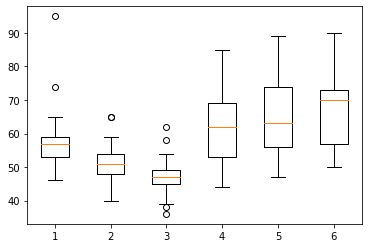

In [35]:
# plot durations of each activity by subject
from numpy import array
from numpy import dstack
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]

# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series

# group data by activity
def data_by_activity(X, y, activities):
	# group windows by activity
	return {a:X[y[:,0]==a, :, :] for a in activities}

# plot activity durations by subject
def plot_activity_durations_by_subject(X, y, sub_map):
	# get unique subjects and activities
	subject_ids = unique(sub_map[:,0])
	activity_ids = unique(y[:,0])
	# enumerate subjects
	activity_windows = {a:list() for a in activity_ids}
	for sub_id in subject_ids:
		# get data for one subject
		_, subj_y = data_for_subject(X, y, sub_map, sub_id)
		# count windows by activity
		for a in activity_ids:
			activity_windows[a].append(len(subj_y[subj_y[:,0]==a]))
	# organize durations into a list of lists
	durations = [activity_windows[a] for a in activity_ids]
	pyplot.boxplot(durations, labels=activity_ids)
	pyplot.show()

# load training dataset
X, y = load_dataset('train', '/content/gdrive/My Drive/input_examples/UCI_HAR_Dataset/')
# load mapping of rows to subjects
sub_map = load_file('/content/gdrive/My Drive/input_examples/UCI_HAR_Dataset/train/subject_train.txt')
# plot durations
plot_activity_durations_by_subject(X, y, sub_map)

Running the example creates six box plots, one for each activity.

Each boxplot summarizes how long (in rows or the number of windows) subjects in the training dataset spent on each activity.

We can see that the subjects spent more time on stationary activities (4, 5 and 6) and less time on the in motion activities (1, 2 and 3), with the distribution for 3 being the smallest, or where time was spent least.

The spread across the activities is not large, suggesting little need to trim the longer duration activities or oversampling of the in-motion activities. Although, these approaches remain available if skill of a predictive model on the in-motion activities is generally worse.

We can create a similar boxplot for the training data with the following additional lines.

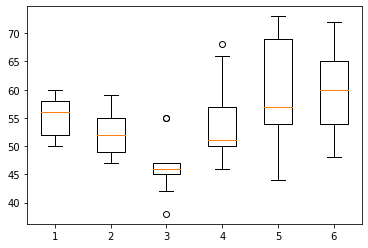

In [36]:
# load test dataset
X, y = load_dataset('test', '/content/gdrive/My Drive/input_examples/UCI_HAR_Dataset/')
# load mapping of rows to subjects
sub_map = load_file('/content/gdrive/My Drive/input_examples/UCI_HAR_Dataset/test/subject_test.txt')
# plot durations
plot_activity_durations_by_subject(X, y, sub_map)

Running the updated example shows a similar relationship between activities.

This is encouraging, suggesting that indeed the test and training dataset are reasonably representative of the whole dataset.

Now that we have explored the dataset, we can suggest some ideas for how it may be modeled.

## Approach to Modeling

In this section, we summarize some approaches to modeling the activity recognition dataset.

These ideas are divided into the main themes of a project.



### Problem Framing

The first important consideration is the framing of the prediction problem.

The framing of the problem as described in the original work is the prediction of activity for a new subject given their movement data, based on the movement data and activities of known subjects.

We can summarize this as:

* Predict activity given a window of movement data.

This is a reasonable and useful framing of the problem.

Some other possible ways to frame the provided data as a prediction problem include the following:

* Predict activity given a time step of movement data.
* Predict activity given multiple windows of movement data.
* Predict the activity sequence given multiple windows of movement data.
* Predict activity given a sequence of movement data for a pre-segmented activity.
* Predict activity cessation or transition given a time step of movement data.
* Predict a stationary or non-stationary activity given a window of movement data
* Some of these framings may be too challenging or too easy.

Nevertheless, these framings provide additional ways to explore and understand the dataset.



### Data Preparation

Some data preparation may be required prior to using the raw data to train a model.

The data already appears to have been scaled to the range [-1,1].

Some additional data transforms that could be performed prior to modeling include:

* Normalization across subjects.
* Standardization per subject.
* Standardization across subjects.
* Axis feature selection.
* Data type feature selection.
* Signal outlier detection and removal.
* Removing windows of over-represented activities.
* Oversampling windows of under-represented activities.
* Downsampling signal data to 1/4, 1/2, 1, 2 or other fractions of a section.


### Predictive Modeling
Generally, the problem is a time series multi-class classification problem.

As we have seen, it may also be framed as a binary classification problem and a multi-step time series classification problem.

The original paper explored the use of a classical machine learning algorithm on a version of the dataset where features were engineered from each window of data. Specifically, a modified support vector machine.

The results of an SVM on the feature-engineered version of the dataset may provide a baseline in performance on the problem.

Expanding from this point, the evaluation of multiple linear, non-linear, and ensemble machine learning algorithms on this version of the dataset may provide an improved benchmark.

The focus of the problem may be on the un-engineered or raw version of the dataset.

Here, a progression in model complexity may be explored in order to determine the most suitable model for the problem; some candidate models to explore include:

* Common linear, nonlinear, and ensemble machine learning algorithms.
* Multilayer Perceptron.
* Convolutional neural networks, specifically 1D CNNs.
* Recurrent neural networks, specifically LSTMs.
* Hybrids of CNNs and LSTMS such as the CNN-LSTM and the ConvLSTM.


Model Evaluation
The evaluation of the model in the original paper involved using a train/test split of the data by subject with a 70% and 30% ratio.

Exploration of this pre-defined split of the data suggests that both sets are reasonably representative of the whole dataset.

Another alternative methodology may be to use leave-one-out cross-validation, or LOOCV, per subject. In addition to giving the data for each subject the opportunity for being used as the withheld test set, the approach would provide a population of 30 scores that can be averaged and summarized, which may offer a more robust result.

Model performance was presented using classification accuracy and a confusion matrix, both of which are suitable for the multi-class nature of the prediction problem.

Specifically, the confusion matrix will aid in determining whether some classes are easier or more challenging to predict than others, such as those for stationary activities versus those activities that involve motion.

